Benjamin Cavallari

In the cell below, include your ``import`` statements

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise:** Use the data from ``Lab3Data.csv`` to create the following plots:
- a plot of $\chi^2$ vs $m$
- a plot that shows the data points, with error bars, as well as the best fit model and the upper and lower bounds models

In the cell below, place the code that creates the $\chi^2$ vs $m$ plot

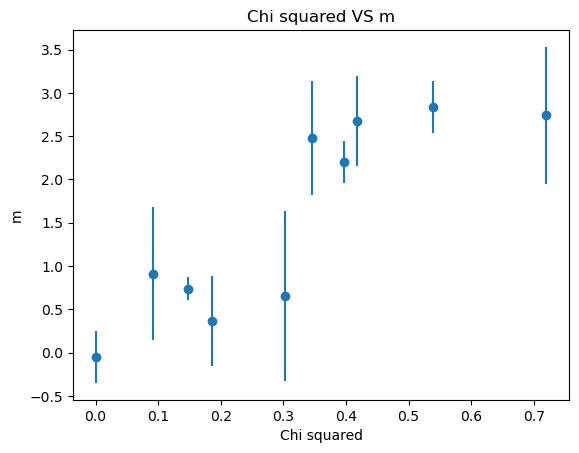

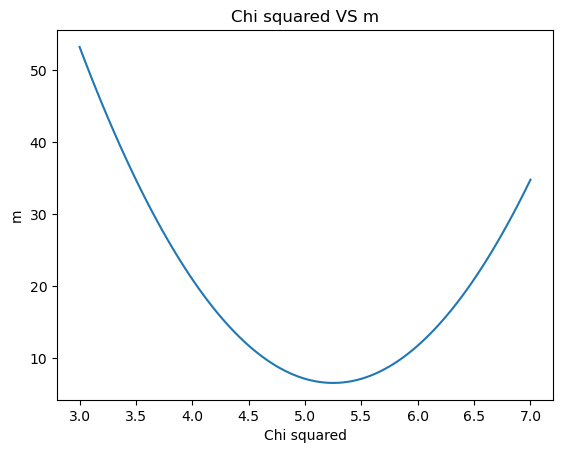

In [5]:
independent_variables, data, uncertainties = np.loadtxt('Lab3Data.csv',delimiter=',',usecols=(0,1,2),unpack=True)
plt.errorbar(independent_variables, data, yerr = uncertainties, fmt='o')

def chi_squared(m):
    x = independent_variables
    y = data
    sigma = uncertainties
    X = sum(((y-(m*x))**2)/(sigma**2))
    return X

m_values = np.linspace(3,7,100)
chi_values = np.zeros(len(m_values))

for i in range(len(m_values)): 
    chi_values[i] = chi_squared(m_values[i])

plt.xlabel("Chi squared")
plt.ylabel("m")
plt.title("Chi squared VS m")
plt.show()

plt.plot(m_values,chi_values)
plt.xlabel("Chi squared")
plt.ylabel("m")
plt.title("Chi squared VS m")
plt.show()

        

In the cell below, place the code (that utilizes code from above) to create the plots that include: data points with error bars; model curves for the best fit and the upper and lower bound slopes.

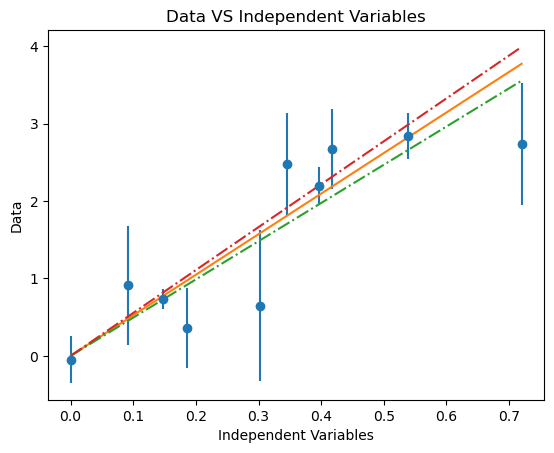

In [7]:
temp_array = m_values[np.where(chi_values < 7.55)]
best_fit = ((temp_array[-1] + temp_array[0])/2)
uncert = (temp_array[-1] - temp_array[0])/2


x_ax = np.linspace(np.min(independent_variables),np.max(independent_variables))
y_ax = np.zeros(len(x_ax))
y_axmin = np.zeros(len(x_ax))
y_axmax = np.zeros(len(x_ax))

def y(x,m):
    return m * x
for i in range(len(x_ax)):
    y_ax[i] = y(x_ax[i],best_fit)
    y_axmin[i] = y(x_ax[i],(best_fit-uncert))
    y_axmax[i] = y(x_ax[i],(best_fit+uncert))
plt.errorbar(independent_variables, data, yerr = uncertainties, fmt='o')
plt.plot(x_ax,y_ax)
plt.plot(x_ax,y_axmin, linestyle='dashdot')
plt.plot(x_ax,y_axmax, linestyle = 'dashdot')
plt.xlabel("Independent Variables")
plt.ylabel("Data")
plt.title("Data VS Independent Variables")
plt.show()



Use a ``print`` statement to print the value of the best fit $m$ and its uncertainty

In [9]:
print("The best fit value is ", best_fit, " + or - ", uncert)

The best fit value is  5.242424242424242  + or -  0.3030303030303032


**Exercise:**  Use the data from ``Lab3bData.csv`` to create the following plots:
- A plot of $\chi^2$ vs $\lambda$
- A plot that shows the data points, with error bars, as well as the best fit model (using your best fit $\lambda$)

In the cell below, place the code that creates the $\chi^2$ vs $\lambda$ plot

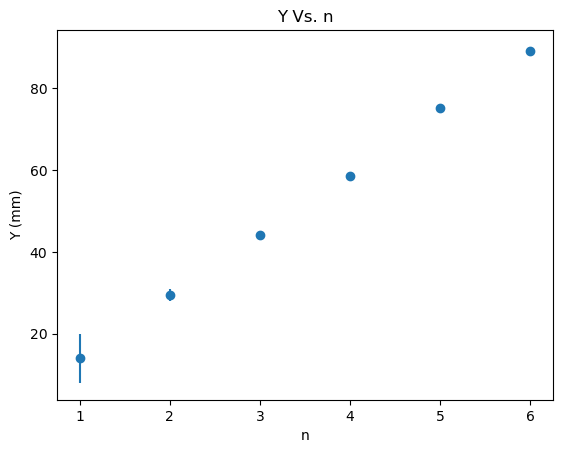

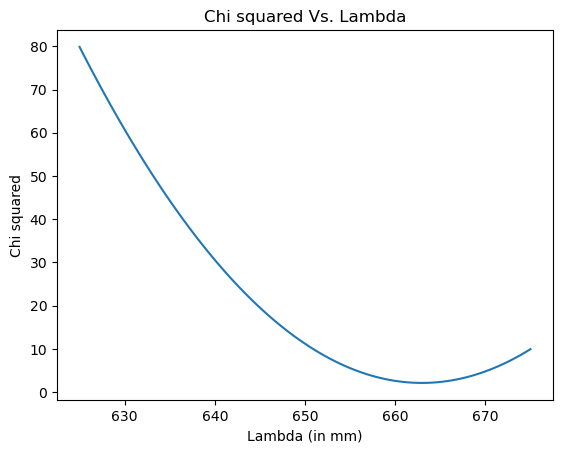

In [11]:
n, y, uy = np.loadtxt('Lab3bdata.csv',delimiter=',',usecols=(0,1,2),unpack=True)
plt.errorbar(n, y, uy, fmt='o')
plt.xlabel("n")
plt.ylabel("Y (mm)")
plt.title("Y Vs. n")
plt.show()

def function(n, lambda_in_nm):
    lambda_in_m = lambda_in_nm * 10**-9
    d = 0.125 * 10**-3
    L = 2.80
    theta = np.arcsin(((n*lambda_in_m) / d))
    return  L * np.tan(theta)*1000

lambda_ax = np.linspace(625,675,100)
chi_squared_ax = np.zeros(len(lambda_ax))
lambda_in_nm = lambda_ax[i]

def chi_squared(lambda_in_nm):
    sigma = uy
    X = sum(((y-(function(n , lambda_in_nm))) **2)/(sigma**2))
    return X

for i in range(len(lambda_ax)):
    chi_squared_ax[i] = chi_squared(lambda_ax[i])    

plt.plot(lambda_ax, chi_squared_ax)
plt.xlabel("Lambda (in mm)")
plt.ylabel("Chi squared")
plt.title("Chi squared Vs. Lambda")
plt.show()

In the cell below, place the code (that utilizes your other code above) to create the plots that include the data points with error bars; and the model curve for the wavelength.

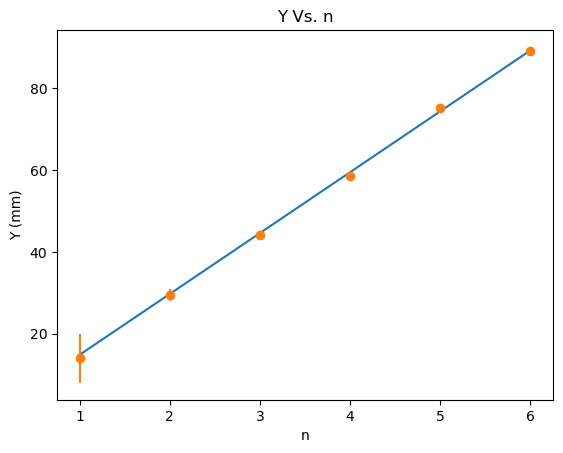

In [13]:
np.where(chi_squared_ax < 7)

lambda_ax[np.where(chi_squared_ax < 7.55)]

new_temp_array = lambda_ax[np.where(chi_squared_ax < 7.55)]

new_best_fit = ((new_temp_array[-1] + new_temp_array[0])/2)

new_uncert = (new_temp_array[-1] - new_temp_array[0])/2

plt.plot(n, function(n,new_best_fit))
plt.errorbar(n, y, uy, fmt='o')
plt.xlabel("n")
plt.ylabel("Y (mm)")
plt.title("Y Vs. n")
plt.show()


Use a ``print`` statement to print the value of the best fit $\lambda$ and its uncertainty.

In [15]:
print("The best fit value is ", new_best_fit," + or - ", new_uncert)

The best fit value is  663.1313131313132  + or -  9.848484848484873


Confirm that this all works by using ``Kernel > Restart Kernel and Run All Cells...``

When you are happy with your results, you will submit by uploading this file on Github.